# **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np



# **Downloading MNIST Dataset**

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


# **Normalizing Images, expanding dimension and Coverting them into Tensors**

In [3]:
train_images=train_images.astype('float32')/255 #normalizing images 
train_images=tf.expand_dims(train_images,axis=3) # expanding dimension

test_images=test_images.astype('float32')/255 #normalizing images 
test_images=tf.expand_dims(test_images,axis=3) # expanding dimension

In [ ]:
train_images.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
train_ds=train_ds.shuffle(1000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds=test_ds.shuffle(1000).batch(32)

In [ ]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

# **Defining Model**

In [ ]:
def get_model():
  model=tf.keras.Sequential([
  layers.Conv2D(64,3,activation='relu'),
  layers.Conv2D(32,3,activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128,activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10,activation='softmax')


  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

# **Running the model and Plotting loss and accuracy graph**

In [ ]:
model=get_model()
hist=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2065 - accuracy: 0.9376 - val_loss: 0.0525 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9742 - val_loss: 0.0427 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0321 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0314 - val_accuracy:

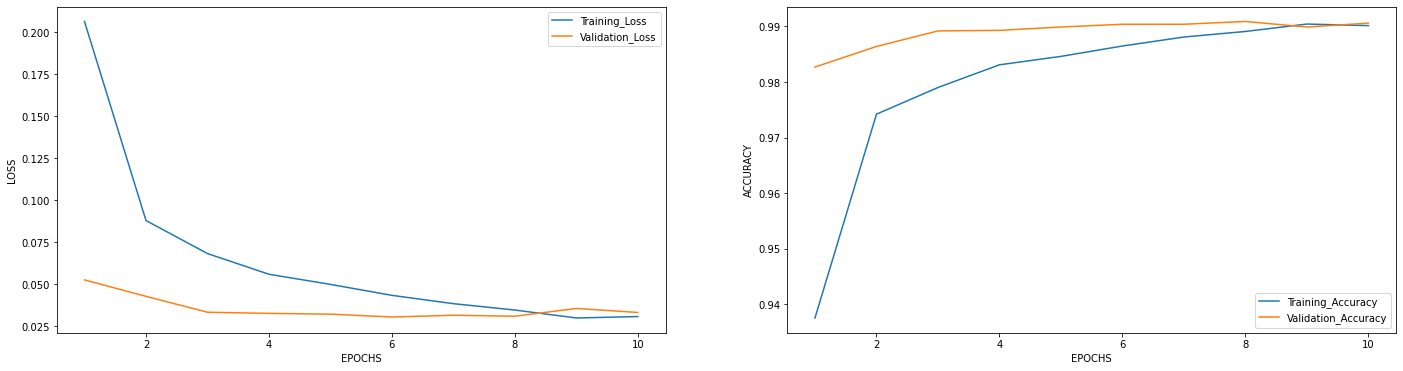

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
training_loss=hist.history['loss']
validation_loss=hist.history['val_loss']
training_acc=hist.history['accuracy']
validation_acc=hist.history['val_accuracy']

epochs=range(1,11)
fig, ax = plt.subplots(1, 2, figsize=(24, 6) )

ax[0].plot(epochs,training_loss,label='Training_Loss')
ax[0].plot(epochs,validation_loss,label='Validation_Loss')
ax[0].set_xlabel('EPOCHS')
ax[0].set_ylabel('LOSS')
ax[0].legend()
ax[1].plot(epochs,training_acc,label='Training_Accuracy')
ax[1].plot(epochs,validation_acc,label='Validation_Accuracy')
ax[1].set_xlabel('EPOCHS')
ax[1].set_ylabel('ACCURACY')
ax[1].legend()
plt.show()


# **Saving model and Testing model for some random images**

In [ ]:
model.save('live_project_model.h5')

In [ ]:
index=np.random.randint(0,10000,5)
def plot_prediction(i):
  tf.squeeze(test_images[i])
  test =test_images[i]
  plt.imshow(tf.squeeze(test_images[i]))
  plt.title('Original_Image')
  print('Label :',test_labels[i])
  test =tf.expand_dims(test,axis=0)
  print('Prediction :',model.predict(test).argmax())
  plt.show()

for i in index:
  plot_prediction(i)

  

# **loading the saved model**

In [ ]:
from IPython.display import display

In [4]:
model=tf.keras.models.load_model('/content/live_project_model.h5')

In [14]:
test_images.shape

TensorShape([10000, 28, 28, 1])

In [8]:
test_predictions=model.predict(test_images)

In [16]:
test_predictions=test_predictions.argmax(axis=1)

In [6]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(test_labels,test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [19]:
print(confusion_matrix(test_labels,test_predictions))

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   4    2 1020    0    0    0    0    6    0    0]
 [   0    0    3 1002    0    3    0    1    1    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   2    0    0    3    0  886    1    0    0    0]
 [   5    3    0    0    1    1  947    0    1    0]
 [   0    2    5    0    0    0    0 1020    1    0]
 [   6    2    1    1    1    0    1    1  958    3]
 [   1    1    1    0    5    4    0    5    4  988]]


In [41]:
index=[]
for k,(i,j) in enumerate(zip(test_labels,test_predictions)):
  if i!=j:
    index.append(k)
print('Total_Incorrect_predictions: {}'.format(len(index)))


Total_Incorrect_predictions: 94


Predicted_label :  0
Ground Truth :  6


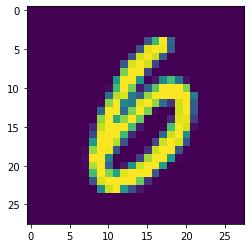

In [47]:
import matplotlib.pyplot as plt
img=test_images[9888]

predictions=model.predict(img[np.newaxis,:,:,:])

plt.imshow(tf.squeeze(img))
print('Predicted_label : ',predictions.argmax())
print('Ground Truth : ',test_labels[9888])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [50]:
# taking output of first layer
layer_output=model.get_layer('conv2d_2').output
# creating new model which takes input from model and outputs feature maps
activation_model = keras.Model(model.input,layer_output)
# passing image to model to get feature map
activations = activation_model(img[np.newaxis,:,:,:])

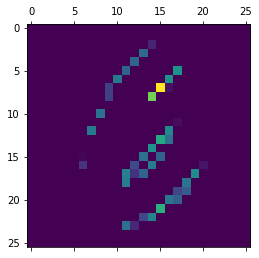

In [79]:
# plotting feature map
plt.matshow(activations[0,:,:,3])

# Plot of feature map of first layer

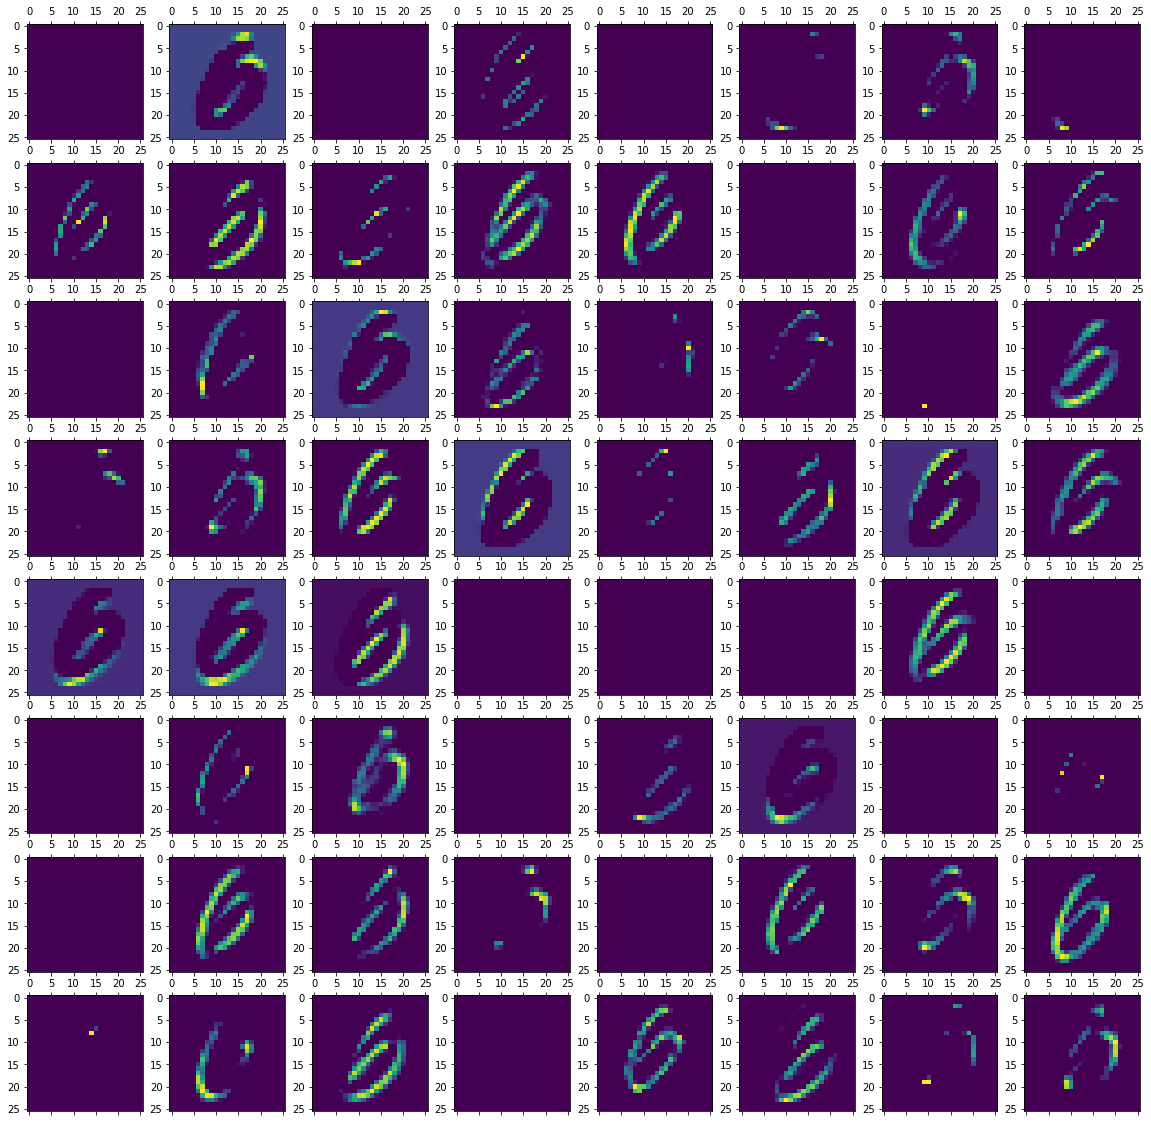

In [85]:

fig,ax=plt.subplots(8,8,figsize=(20,20))
for i in range(64):
  ax.ravel()[i].matshow(activations[0,:,:,i])
  

Plot of feature map of second layer

In [88]:
# taking output of second convolution layer and third layer
layer_2_output = model.get_layer('conv2d_3').output
layer_3_output = model.get_layer('max_pooling2d_1').output
# making new model to giv output 
activation_model1=keras.Model(model.input, outputs=[layer_2_output,layer_3_output])
# passing image into activation_model1
activations1,activations2=activation_model1(img[np.newaxis,:,:,:])

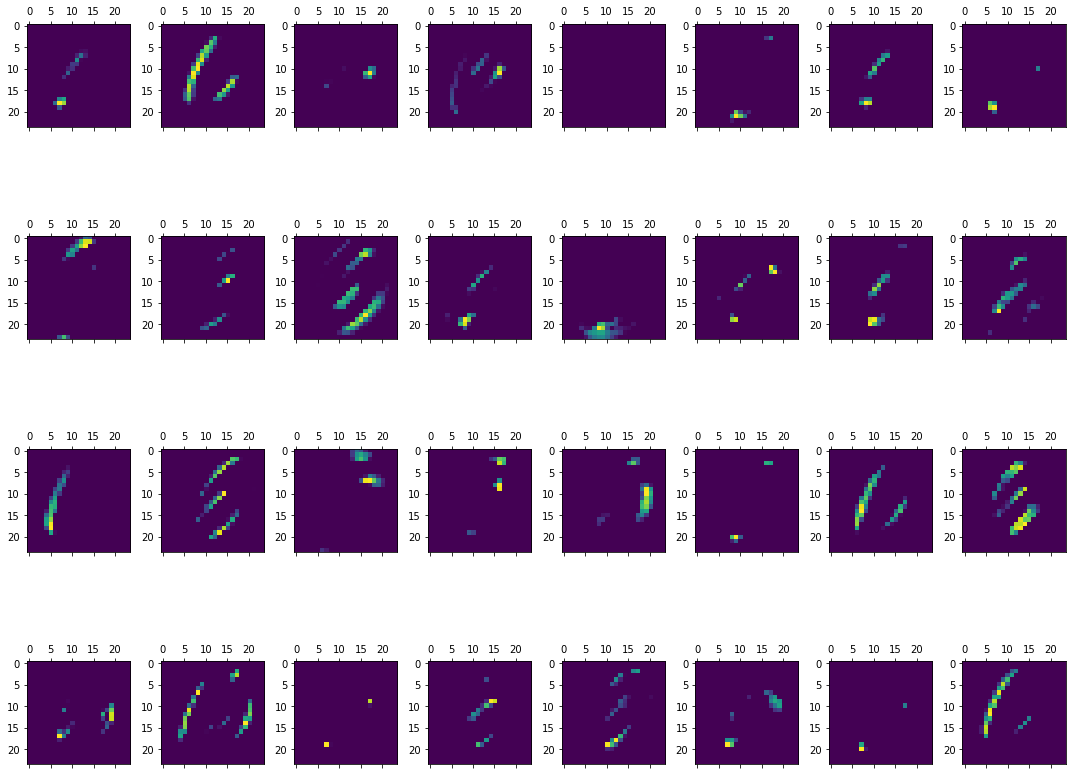

In [113]:

fig, ax = plt.subplots(4,8,figsize=(15,15))
for i in range(32):
  ax.ravel()[i].matshow(activations1[0,:,:,i])
  plt.tight_layout() 

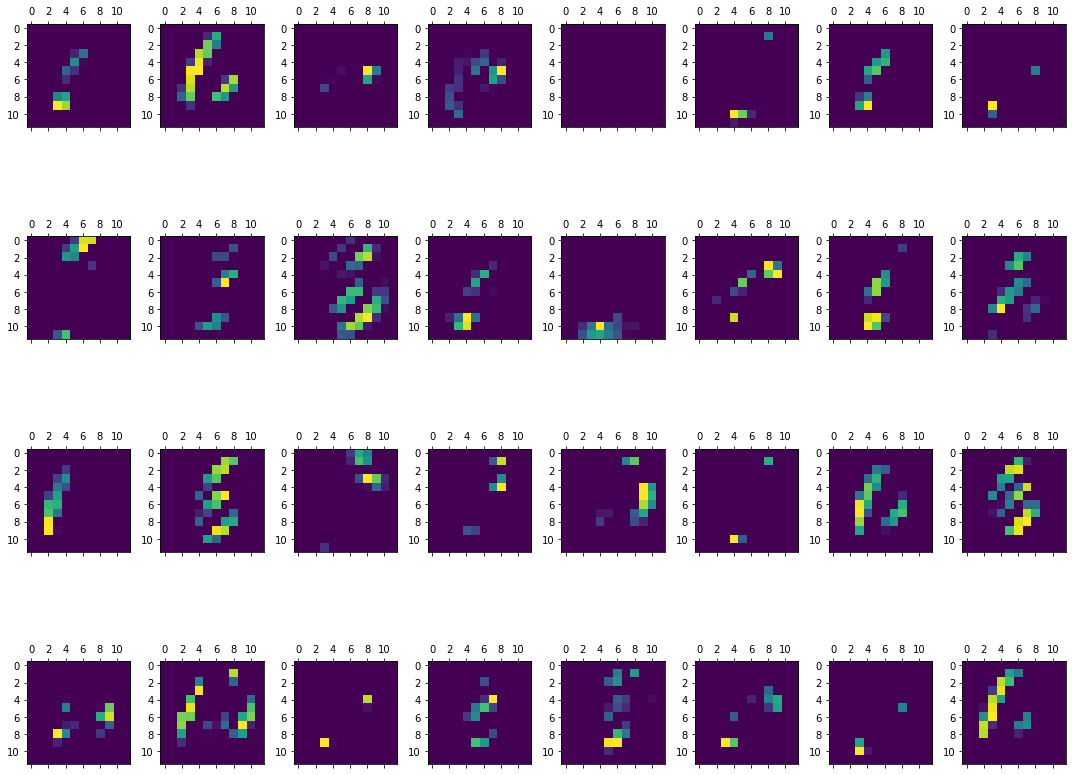

In [122]:
fig, ax = plt.subplots(4,8,figsize = (15,15))
for i in range(32):
  ax.ravel()[i].matshow(activations2[0,:,:,i])
  plt.tight_layout()
  